###  SMOTE and its varaiation

In [3]:
import pandas as pd
import seaborn as sns


In [5]:
df_example = pd.read_csv("Churn_Modelling.csv")
df_example.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

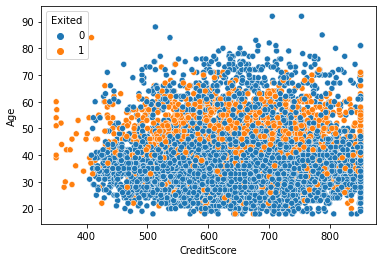

In [8]:
#I read the csv churn data into variable called df. Here I would only use two continuous features CreditScore and Age with the target Exited
df_example = df_example[['CreditScore', 'Age', 'Exited']]
sns.scatterplot(data = df_example, x ='CreditScore', y = 'Age', hue = 'Exited')

In [13]:
df_example

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
...,...,...,...
9995,771,39,0
9996,516,35,0
9997,709,36,1
9998,772,42,1


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_example[['CreditScore', 'Age']], df_example[['Exited']])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])


In [17]:
df_oversampler

,CreditScore,Age
0,619,42
1,608,41
2,502,42
3,699,39
4,850,43
...,...,...
15921,591,38
15922,623,45
15923,723,30
15924,574,47


C:\Users\VisionRI-Shrikant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

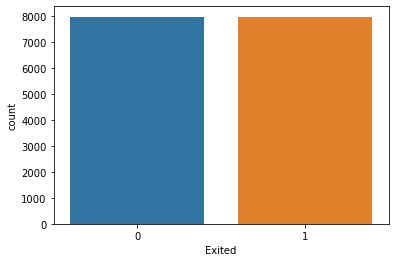

In [18]:
df_oversampler['Exited'] = y 
sns.countplot(df_oversampler['Exited'])

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

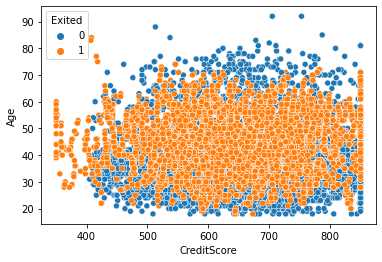

In [19]:
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df_example[['CreditScore', 'Age']], df_example['Exited'], test_size = 0.2, stratify = df_example['Exited'], random_state = 101)

In [22]:
#Create an oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [23]:
#Training with imbalance data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.19      0.04      0.07       407

    accuracy                           0.77      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.67      0.77      0.71      2000



In [24]:
#Training with oversampled data
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79      1593
           1       0.36      0.60      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



In [25]:
df = pd.read_csv("Churn_Modelling.csv")
df_example = df[['CreditScore', 'IsActiveMember', 'Exited']]

In [26]:
df_example

,CreditScore,IsActiveMember,Exited
0,619,1,1
1,608,1,0
2,502,0,1
3,699,0,0
4,850,1,0
...,...,...,...
9995,771,0,0
9996,516,1,0
9997,709,1,1
9998,772,0,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_example[['CreditScore', 'IsActiveMember']],df['Exited'], test_size = 0.2,stratify = df['Exited'], random_state = 101)

let’s create two different classification models once more; one trained with the imbalanced data and one with the oversampled data. First, let’s try SMOTE-NC to oversampled the data.

In [28]:
from imblearn.over_sampling import SMOTENC
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC([1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [29]:
#Classifier with imbalance data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\VisionRI-Shrikant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VisionRI-Shrikant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VisionRI-Shrikant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Classifier with SMOTE-NC
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1593
           1       0.28      0.65      0.39       407

    accuracy                           0.58      2000
   macro avg       0.57      0.61      0.53      2000
weighted avg       0.74      0.58      0.62      2000



In [31]:
df_example = df[['CreditScore', 'Age', 'Exited']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_example[['CreditScore', 'Age']], df['Exited'], test_size = 0.2,  stratify = df['Exited'], random_state = 101)

In [33]:
#By default, the BorderlineSMOTE would use the Borderline-SMOTE1
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

In [34]:
classifier_border = LogisticRegression()
classifier_border.fit(X_oversample_borderline, y_oversample_borderline)
print(classification_report(y_test, classifier_border.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1593
           1       0.35      0.60      0.45       407

    accuracy                           0.69      2000
   macro avg       0.61      0.66      0.62      2000
weighted avg       0.77      0.69      0.72      2000



In [35]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
classifier_svm = LogisticRegression()
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1593
           1       0.37      0.57      0.45       407

    accuracy                           0.72      2000
   macro avg       0.62      0.66      0.63      2000
weighted avg       0.77      0.72      0.74      2000



In [36]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)
classifier_ada = LogisticRegression()
classifier_ada.fit(X_oversample_ada, y_oversample_ada)
print(classification_report(y_test, classifier_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1593
           1       0.33      0.68      0.45       407

    accuracy                           0.66      2000
   macro avg       0.61      0.67      0.60      2000
weighted avg       0.78      0.66      0.69      2000

